In [112]:
import networkx as nx
import matplotlib.pyplot as plt 

In [154]:
G = nx.DiGraph()

nodeList = [
    "S3A", "S3B", "S3G", "S3H",
    "S2C", "S2D", "S2I",
    "S1E", "S1L",
    "TC",
    "R1K", "R1M",
    "R2N", "R2O",
    "R3R", "R3S", "R3T"
]



for i in nodeList:
    G.add_node(i)
    
nodeColor = ["#DDF9E6"]*4 + ["#83DE8F"]*3 + ["#70BF7B"]*2 + ["#E4BE01"] + ["#FC2E50"]*2 + ["#FC7A8F"]*2 + ["#F9CAD2"]*3

In [159]:
G.add_edge("S3A", "S2C")
G.add_edge("S3B", "S2D")
G.add_edge("S3G", "S2I")
G.add_edge("S3H", "S2I")

G.add_edge("S2C", "S1E")
G.add_edge("S2C", "R1K")
G.add_edge("R1K", "S2C")
G.add_edge("S2D", "S1E")
G.add_edge("S2I", "S1L")
G.add_edge("S2I", "R1K")
G.add_edge("R1K", "S2I")
G.add_edge("S2I", "R1M")
G.add_edge("R1M", "S2I")
G.add_edge("S1E", "TC")
G.add_edge("S1L", "TC")

G.add_edge("TC", "R1K")
G.add_edge("TC", "R1M")

G.add_edge("R1K", "R2N")
G.add_edge("R1M", "R2O")

G.add_edge("R2N", "R3R")
G.add_edge("R2N", "R3S")
G.add_edge("R2O", "R3T")

G.add_edge("R3S", "R3T")

pos = nx.spring_layout(G, k=10)
G.nodes()

NodeView(('S3A', 'S3B', 'S3G', 'S3H', 'S2C', 'S2D', 'S2I', 'S1E', 'S1L', 'TC', 'R1K', 'R1M', 'R2N', 'R2O', 'R3R', 'R3S', 'R3T'))

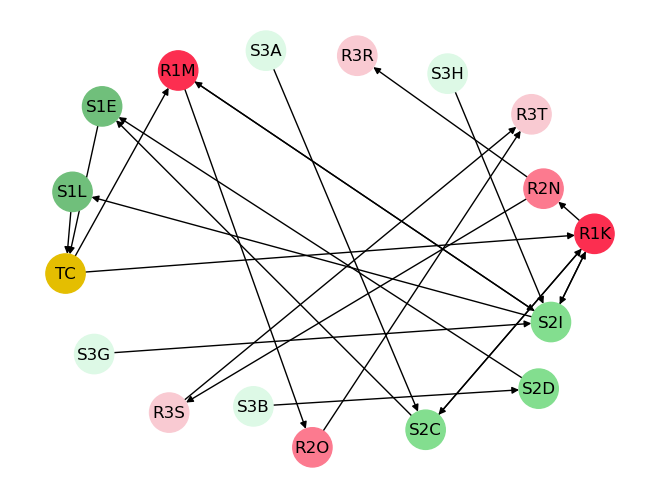

In [160]:
nx.draw(G, pos, with_labels=True, node_color = nodeColor, node_size=800)
plt.show()